# GW150914 analysis

Analyse GW150914 data using TUPAK

In [2]:
%pylab inline
# %matplotlib notebook
import numpy as np
import pylab as plt

%load_ext autoreload
%autoreload 2
import peyote
import corner

import logging
logging.getLogger().addHandler(logging.StreamHandler())
logging.getLogger().setLevel('DEBUG')

import matplotlib.mlab as mlab

Populating the interactive namespace from numpy and matplotlib


## load and plot GW150914 data
data has been downloaded from the LIGO Open Science Center (LOSC) and pre-formatted

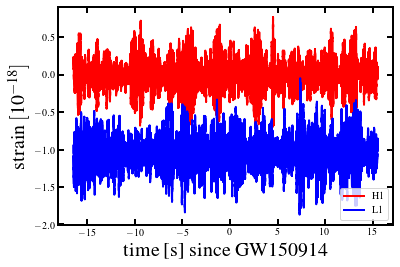

In [3]:
data_file = 'tutorial_data/GW150914_strain_data.npy'
time_series, strain_H1, strain_L1 = np.load(data_file)

time_of_event = 1126259462.44

plt.plot(time_series - time_of_event, strain_H1 * 1e18, 'r', label = 'H1')
plt.plot(time_series - time_of_event, strain_L1 * 1e18, 'b', label = 'L1')

plt.xlabel('time [s] since GW150914')
plt.ylabel(r'strain $[10^{-18}]$')
plt.legend(loc='lower right')

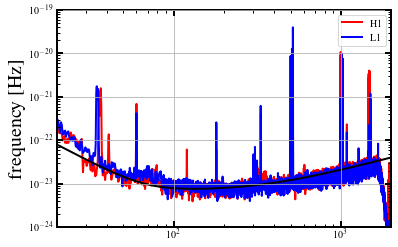

In [4]:
sampling_frequency = np.int(peyote.utils.sampling_frequency(time_series))

NFFT = 4 * sampling_frequency

power_spectral_density_H1, frequency_series = mlab.psd(strain_H1, Fs = sampling_frequency, NFFT = NFFT)
power_spectral_density_L1, frequency_series = mlab.psd(strain_L1, Fs = sampling_frequency, NFFT = NFFT)

## smoothed power spectral density -- see LOSC tutorial (https://losc.ligo.org/s/events/GW150914/LOSC_Event_tutorial_GW150914.html)
# this can be used as the psd in the searches instead
power_spectral_density_smooted = (1.e-22*(18./(0.1+frequency_series))**2)**2+0.7e-23**2+((frequency_series/2000.)*4.e-23)**2

plt.loglog(frequency_series, np.sqrt(power_spectral_density_H1), 'r', label='H1')
plt.loglog(frequency_series, np.sqrt(power_spectral_density_L1), 'b', label='L1')
plt.loglog(frequency_series, np.sqrt(power_spectral_density_smooted), 'k')

plt.grid('on')

plt.ylabel(r'amplitude spectral density [strain/$\sqrt{\rm Hz}$]')
plt.ylabel(r'frequency [Hz]')
plt.ylim(1e-24, 1e-19)
plt.xlim(20, 2000)

plt.legend(loc='best')
